<center>
    <img src="./images/msp_header.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Filter Design with the Window Method

In [1]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/hxWyLvSwh7k" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We start with the **ideal filter** (sinc), which is infinitely long. To make it causal and to obtain a desired trade-off between the transition band width and the stopband attenuation, we multiply it with a finite length window. This window is either obtained by optimization, or is chosen from one of the “pre-fabtricated” ones.  Longer filters also lead to narrower transition bands.

The resulting frequency response after multiplying the ideal impulse response (sinc) with the window function is then the convolution of the ideal frequency response and the window frequency response. The resulting passband width is the **ideal passband width plus the passband width of the window. The resulting stopband starts** at the stopband frequency of the ideal frequency response **(cutoff frequency) plus the frequency of the start of the stopband of the window function (adding the transition band).**

To obtain a given passband or stopband, this has to be taken into account, and the cutoff frequency has to be modified accordingly.

In [2]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/4NS3bboX0qY" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

## Example:

In [3]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/exAkS6ZDb4c" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We saw that the **Kaiser Window** at least fulfils the **requirement** for the attenuation of our downsampling application example. How do we get the correct start of the **stopband** (for attenuating the aliasing for downsampling sufficiently) using our filter design method?  

Our stop band should start at 0.5 for a downsampling factor of N=2. Looking at the Kaiser window with $\beta=8$ we see that we get -60 dB at a normalized frequency of about 0.36. Hence our ideal filter needs to have the **end of its pass band** at 0.5-0.36=0.14 (remeber here 1 is the Nyquist frequency) , hence $\omega_s=\omega_c=0.14\pi$. 

**Observe:** here we need the multiplication with pi since for our formula pi is the Nyquist frequency. 
Now we just need to plug this into our formula for the ideal filter (the sinc function), with L=16,

$$\large
h(n)=\frac{sin(\omega_c (n-7.5))}  {\omega_c (n-7.5)}
$$
for $n=0,...,15$,

or, with a different normalization to let the passband start at 0 dB:

$$\large
h(n)=\frac{sin(\omega_c (n-7.5))}   {\pi (n-7.5)}
$$

(with $\omega_c=0.14\pi$) and multiply it with our Kaiser window.


In iPython:

In [4]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/6xq8OB5cvno" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(16);
h=np.sin(0.14*np.pi*(n-7.5))/(np.pi*(n-7.5));
hk=np.kaiser(16,8);
hfilt=hk*h

plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Its frequence response:

In [6]:
import scipy.signal as signal

def freqz(x):
    # get frequency bins and according magnitude values 
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi 

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,np.pi,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,np.pi,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

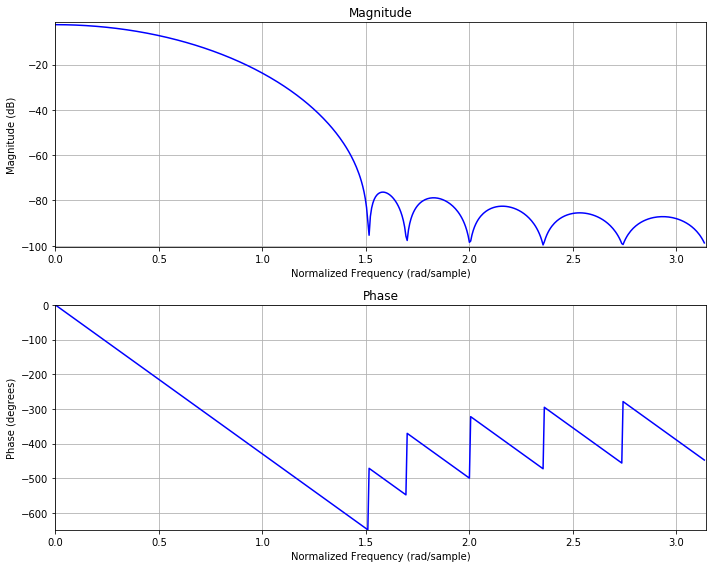

In [7]:
freqz(hfilt)

Here we see that at normalized frequency 0.5 it has indeed enough attenuation, at about -80 dB! But the pass band (up to about -6dB) is only up to about normalized frequency 0.15, which is usually not enough! We didn't really specify it, but for practical purposes this would usually not work. 

So how can we improve the **pass band** now? Since we already tried different compromises for the width of the transition band and the stop band attenuation, we can now try increasing the filter length. Try L=32 (instead of 16). The following is the **Kaiser window** for $\beta=8$ with length **L=32**:


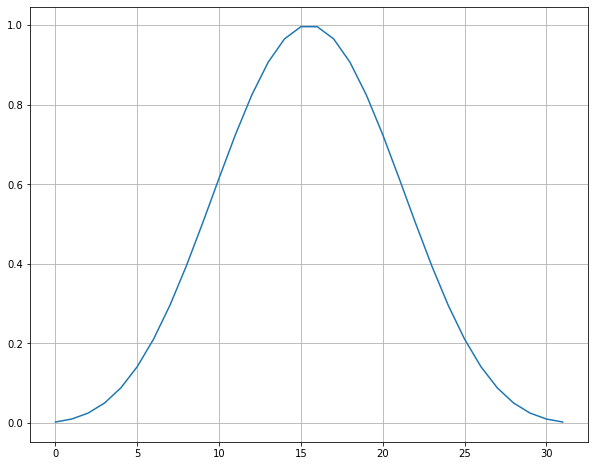

In [9]:
hk=np.kaiser(32,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Its frequency response is:

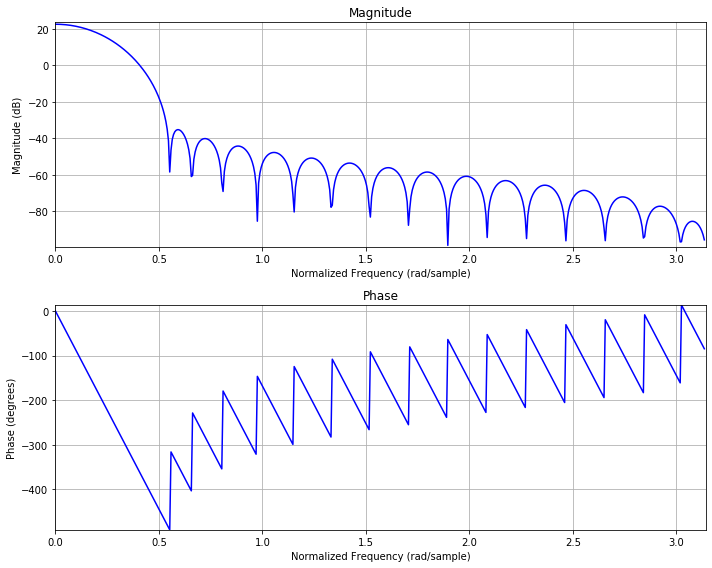

In [10]:
freqz(hk)

**Observe:** The Kaiser window would already be our final filter, if our ideal impulse response would consist of an infinite sequence of ones. This is the case if our ideal filter is only a delta pulse at frequency zero, hence an infinitely small low pass filter.

Observe that the main lobe of this length 32 window (up to about 0.17) is about half as wide as the main lobe at length 16! In this way, we half the transition width of our resulting filter. Here we can say that our pass band ends at normalized frequency 0.17. Hence we need to have our ideal filter with a stop band starting at 0.5-0.17=0.33, resulting in the formula for the ideal impulse response (as above for the length 16 filter), with $\omega_c=0.33\cdot \pi$, and a delay of 31/2=15.5:

$$\large
h(n)=\frac{sin(\omega_c (n-15.5))}  {\pi (n-15.5)}
$$
for n=0,...31,

and multiply it with our Kaiser window.

In iPython:





In [11]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/MTqJw4oFqRw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

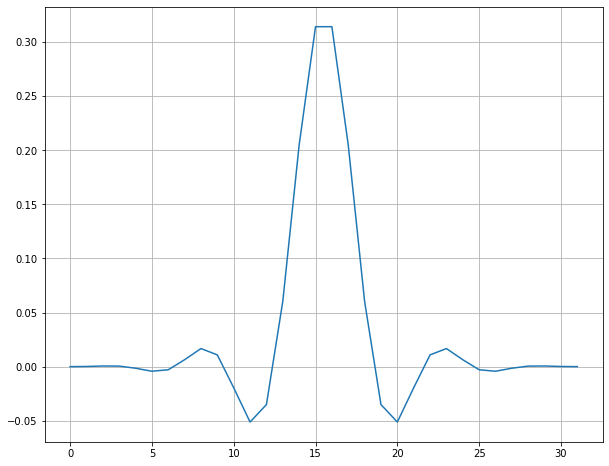

In [12]:
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8);
#multiply ideal filter and Kaiser window:
hfilt=hk*h;
plt.figure(figsize=(10,8))
plt.plot(hfilt)
plt.grid()

Resulting in the following impulse response:

Its frequency response is: 


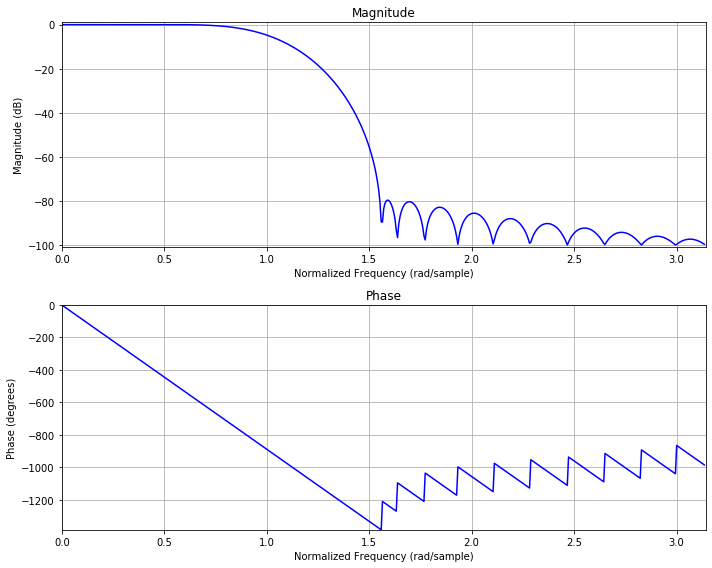

In [13]:
freqz(hfilt)

Here we can now see that our stop band, which starts at 0.5, has indeed still enough attenuation, at about -80 dB, and if we take 3dB as the limit for our **pass band**, it goes up to normalized frequency **0.3**.

Going back to our downsampling example, where we downsample from 44.1 kHz to 22.05 kHz sampling rate, the normalized frequency 0.5 corresponds to 11 kHz, and the upper limit of our pass band is 0.3 or 6.6 kHz. This now looks like a usable filter for our application!

This also show why the **usable** frequencies in a time-discrete representation is always clearly **lower** than the **Nyquist** frequency (we need filters, which have **transition bands**).

## How to Obtain a High Pass or Band Pass, Modulation

### 1st Approach (Ideal Filter Design)

In [14]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/spJz71UONj4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We again design an ideal filter, and then window it.

For instance if we want to obtain a high pass, we can start to design an **ideal high pass filter**, using our inverse DTFT, which gives us a doubly infinite impulse response, from $-\infty$ to $+ \infty$, and then window this ideal impulse response to obtain an FIR filter. For the ideal high pass, we can define the desired frequency response $H_d(\Omega)$ as 1 at the high frequencies, above a cutoff frequency $\Omega_c$, and 0 at the low frequencies,

$$\large
H_d(\Omega) = \begin{cases}
        \begin{split}
            1         \text{ for } & \mid \Omega \mid >\Omega_c \\
              \text{0 else } & {} \\
         \end{split}
    \end{cases}
$$

If we want to have a real valued impulse response, we need to make the frequency response such that its values at negative frequencies are **conjugate complex** of the values at  positive frequencies. The easiest way to do it here is to have the negative frequencies identical to the positive frequencies,


$H_d(\Omega)=\begin{cases}
        \begin{split}
            1               & \text{ for } & -\pi<\Omega<-\Omega_c \\
            0 & \text{ for } & -\Omega_c<\Omega<+\Omega_c \\
            1 & \text{ for } & \Omega_c <\Omega <\pi
        \end{split}
    \end{cases}
$

Now we can apply the inverse DTFT, find an analytical solution, just like with the low pass filter, to obtain the ideal impulse response, and then **multiply it with a window** to obtain an FIR filter.


### 2nd Approach (Modulation)

In [15]:
%%html
<Center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/SMAXoRk8HYg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

**Shifting** our (ideal) pass band to the **desired position in frequency**. In this way, we can turn a low pass into a band pass or a high pass, depending on where we shift our pass band (in this way we can turn a new problem into our known problem, the design of a lowpass filter). How do we shift our pass band in the frequency domain? We convolve it in the frequency domain with a Dirac impulse at the desired center frequency $\Omega_0$,

$$\large
H_d(\Omega) * \delta(\Omega-\Omega_0)=H_d(\Omega-\Omega_0)
$$

If we want to have real valued impulse responses, we need to preserve the symmetry between positive and negative frequencies, by also shifting the frequency response by the same amount to negative frequencies,

$$\large
H_d(\Omega)*(\delta(\Omega-\Omega_0)+\delta(\Omega+\Omega_0))=H_d(\Omega-\Omega_0)+H_d(\Omega+\Omega_0)
$$

How does this change our (ideal) impulse response? To answer, we take the inverse DTFT. The convolution in the frequency domain becomes a multiplication in the time domain. Now we just need the inverse DTFT of $(\delta(\Omega-\Omega_0)+\delta(\Omega+\Omega_0))$
, or the inverse DTFT of $\delta(\Omega-\Omega_0)$. To obtain it we can simply use our fomula for the inverse DTFT,

$$\large
\frac{1}{2\pi} \int_{-\pi}^{\pi}\delta (\Omega - \Omega_0)\cdot e^{j\Omega\cdot n }d\Omega=\frac{1}{2\pi}e^{j\cdot\Omega_0\cdot n}
$$

Remember, the integration of a function multiplied with a Dirac impulse is the function value at the position of the Dirac (here:$\Omega_0$),

$$\large
\int_{-\infty}^{\infty}\delta(\Omega - \Omega_0) H(\Omega) d\Omega = H(\Omega_0)
$$

Now we can get the inverse DTFT of $(\delta(\Omega-\Omega_0)+\delta(\Omega+\Omega_0))$, which is now

$$\large
\frac{1}  {2 \pi} \cdot (e^{j \cdot \Omega_0 \cdot n} +  e^{-j \cdot \Omega_0 \cdot n})=\frac{1}{\pi} \cdot cos(\Omega_0 \cdot n)
$$

This is the function, which we  need to multiply with our ideal low pass filter, to obtain an ideal filter where the pass band is centered around $\Omega_0$. We call this cos function a **“modulation function”**, and the multiplication with this function a **“modulation”**

Observe that we can also introduce a phase shift $p$ into this modulation function, for instance turning the cos function into a sine function. This would still work, because in the frequency domain this is a multiplication with another complex exponential from the phase term in the time-domain, just like from a time lag. It would just introduce a phase change in the final filter.

#### Python Example

This principle can also be applied directly to audio signals. The following example takes the signal from a microphone and modulates (multiplies) it with a 500 Hz sine function:

In [23]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/7rEpmAY1qkU" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [22]:
"""
PyAudio Example: Mix speech with a 1 kHz carrier (i.e., record a
few samples, mix/modulate them with a sine wave, and play them back immediately).
Using block-wise processing 
Gerald Schuller, Octtober 2014

--- Modified by Renato Profeta to include GUI, April 2020
"""

# Imports
import pyaudio
import struct
import numpy
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading

# Parameters
CHUNK = 5000 #Blocksize
WIDTH = 2 #2 bytes per sample
CHANNELS = 1 #2
RATE = 32000  #Sampling Rate in Hz
RECORD_SECONDS = 8

def audio_app(toogle_run):
    while(True):
        if toggle_run.value==True:
            break
        
        #Reading from audio input stream into data with block length "CHUNK":
        data = (stream.read(CHUNK))
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK, data))
        samples=(list(shorts))

        #start block-wise signal processing:

        #Compute a block/an array of sine samples with 500 Hz:
        s=numpy.sin(2*numpy.pi/RATE*500*numpy.arange(0,CHUNK));
        #multiply/modulate the signal with the sine samples:
        samples=samples*s;
        samples=(numpy.clip(samples, -32000,32000)).astype(int)
        #end signal processing

        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK)

# GUI
toggle_run = ToggleButton(description='Stop')
button_start = Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
        toggle_run.disabled=True
toggle_run.observe(on_click_toggle_run, 'value')
        
box_buttons = HBox([button_start,toggle_run])

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=audio_app, args=(toggle_run,))

# Start Audio Stream
# Create 
p = pyaudio.PyAudio()

stream = p.open(format=p.get_format_from_width(WIDTH),
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                #input_device_index=10,
                frames_per_buffer=CHUNK)
                
display(box_buttons)




**Observe:** Sounds and voice sound higher pitched, like a Mickey-Mouse voice, as a result of the frequency shift!

**In Conclusion:**
We can shift our ideal filter in the frequency domain by multiplying the ideal (or already windowed) impulse response with a modulation function

$$\large
\frac{1}{\pi}\cdot cos(\Omega_0\cdot (n-p))
$$

where p is some phase delay.<br>

This is illustrated in the following pictures. First a low pass original spectrum,


![Lecture6-1.png](./images/Lecture6-1.png)






Next the spectrum after our modulation with frequency $\Omega_0$


![Lecture6-2.png](./images/Lecture6-2.png)


**Example:**

To obtain a high pass, we need to shift the pass band from 0 to $\pi$, hence we get $\Omega_0=\pi$, and choose p=0. The modulation function is then
$\frac{1}{\pi}\cdot cos(\pi\cdot n)$

which is simply a sequence of +/-1!

For instance for our low pass:


In [24]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/xdkBS_J5BIg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [18]:
import numpy as np
n=np.arange(32);
#ideal impulse response:
h=np.sin(0.33*np.pi*(n-15.5))/(np.pi*(n-15.5));
#Kaiser window:
hk=np.kaiser(32,8)
#multiply ideal filter and Kaiser window:
hfilt=hk*h


We can make a high pass out of it using modulation:

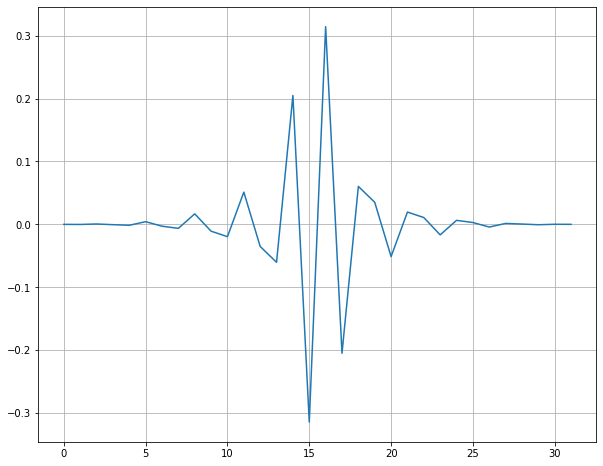

In [19]:
import matplotlib.pyplot as plt
hp=hfilt*np.cos(np.pi *np.arange(32))

plt.figure(figsize=(10,8))
plt.plot(hp)
plt.grid()

Here we can see the effect of the modulation with the +/-1 sequence.

The resulting frequency response is:

And for the frequency response we get:


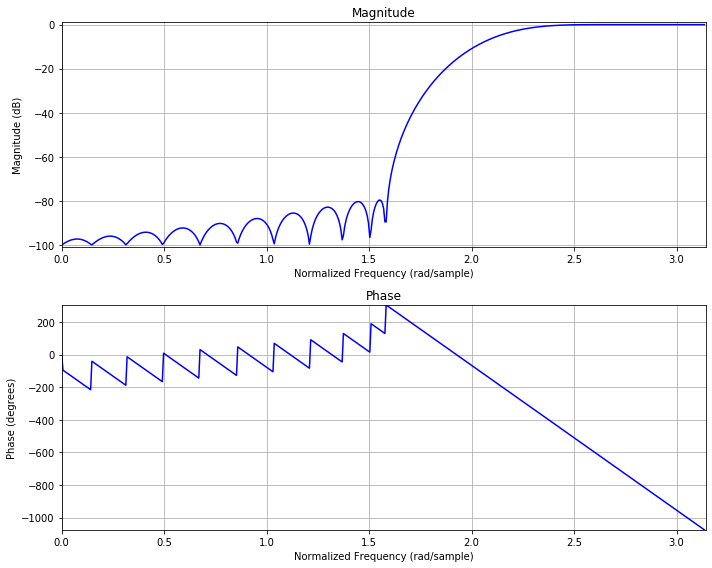

In [20]:
freqz(hp)

and we see that we indeed obtained a high pass. It is basically looks mirrored around the center. It really is shifted, but what we see as the high pass part was the negative frequency part of our low pass. 

We can also obtain a **band pass** with center frequency pi/2 with:

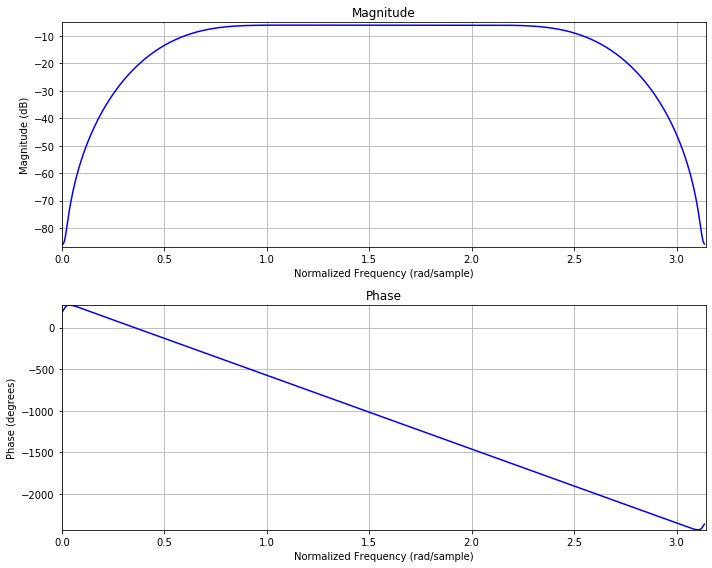

In [21]:
hbp=hfilt*np.cos(np.pi/2 *np.arange(32))
freqz(hbp)

And we see that we indeed get a band pass!

Observe that we obtain a pass band in this band pass case which is twice as wide as in the case of a low pass or a high pass, because here the negative frequencies of the low or high pass case appear as the other half of the pass band.